In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import random
from scipy.linalg import fractional_matrix_power
from polyagamma import random_polyagamma


In [197]:
%run Universal_Functions.ipynb

In [198]:
# Simulated Data
STUDENT_COUNT = 10
PROBLEM_COUNT = 50
SIGMA_A = 100
SIGMA_B = 100

a_star = np.random.uniform(0.5, 1.5, PROBLEM_COUNT)
b_star = np.linspace(-1, 1, PROBLEM_COUNT)
theta_star = np.random.normal(0, 1.25, STUDENT_COUNT)

Y = np.zeros((STUDENT_COUNT, PROBLEM_COUNT))
for p in range(len(Y)):
    for i in range(len(Y[p])):
        prob = np.exp(a_star[i] * theta_star[p] + b_star[i]) / (1 + np.exp(a_star[i] * theta_star[p] + b_star[i]))
        Y[p, i] = np.random.binomial(1, prob)



In [282]:
Y

array([[0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 

In [263]:
# Initial Conditions:

data = [Y]

a_1 = np.zeros(PROBLEM_COUNT)
b_1 = np.zeros(PROBLEM_COUNT)
theta_1 = np.zeros(STUDENT_COUNT)
w_1 = np.zeros((STUDENT_COUNT, PROBLEM_COUNT))
for p in range(len(w_1)):
    for i in range(len(w_1[p])):
        w_1[p][i] = random_polyagamma(z = a_1[i] * theta_1[p] + b_1[i])

a_2 = np.ones(PROBLEM_COUNT) * 100
b_2 = np.ones(PROBLEM_COUNT) * 100
theta_2 = np.ones(STUDENT_COUNT) * 40
w_2 = np.zeros((STUDENT_COUNT, PROBLEM_COUNT))
for p in range(len(w_2)):
    for i in range(len(w_2[p])):
        w_2[p][i] = random_polyagamma(z = a_2[i] * theta_2[p] + b_2[i])

x_init1 = np.hstack([a_1, b_1, theta_1])
y_init1 = np.hstack([a_2, b_2, theta_2])

x_init2 = np.array([w_1, a_1, b_1, theta_1], dtype = 'object')
y_init2 = np.array([w_2, a_2, b_2, theta_2], dtype = 'object')

# Log Density of Model

$$Y_{pi} | a, b, \theta \overset{ind.}{\sim} Ber(\frac{e^{a_i\theta_p + b_i}}{1 + e^{a_i\theta_p + b_i}}) \text{,  } 1 \leq i \leq I \text{,  } 1 \leq p \leq P$$

$$a_i | \sim N(0, \sigma_a^2)$$

$$b_i | \sim N(0, \sigma_b^2)$$

$$\sigma_a^2 = \sigma_b^2 = 100$$

$$\theta_i \sim N(0, 1)$$


$$p(Y_{pi} = 1| a, b, \theta) = \frac{e^{a_i\theta_p + b_i}}{1 + e^{a_i\theta_p + b_i}}$$

$$p(y | a, b, \theta) = \prod_i\prod_p (\frac{e^{a_i\theta_p + b_i}}{1 + e^{a_i\theta_p + b_i}})^{y_{pi}}(\frac{1}{1 + e^{a_i\theta_p + b_i}})^{1 - y_{pi}}$$

$$p(a, b, \theta) = p(y | a, b, \theta) \cdot p(a) \cdot p(b) \cdot p(\theta) = $$

$$\prod_i\prod_p (\frac{e^{a_i\theta_p + b_i}}{1 + e^{a_i\theta_p + b_i}})^{y_{pi}}(\frac{1}{1 + e^{a_i\theta_p + b_i}})^{1 - y_{pi}} \cdot \prod_i \frac{1}{\sqrt{2\sigma_a^2\pi}} \cdot e^{-\frac{1}{2\sigma_a^2} \cdot a_i^2} \cdot \prod_i \frac{1}{\sqrt{2\sigma_b^2\pi}} \cdot e^{-\frac{1}{2\sigma_b^2} \cdot b_i^2} \cdot \prod_p \frac{1}{\sqrt{2\pi}} \cdot e^{-\frac{1}{2} \cdot \theta_i^2} \propto$$

$$\prod_i\prod_p (\frac{e^{a_i\theta_p + b_i}}{1 + e^{a_i\theta_p + b_i}})^{y_{pi}}(\frac{1}{1 + e^{a_i\theta_p + b_i}})^{1 - y_{pi}} \cdot \prod_i e^{-\frac{1}{2\sigma_a^2} \cdot a_i^2} \cdot \prod_i e^{-\frac{1}{2\sigma_b^2} \cdot b_i^2} \cdot \prod_p e^{-\frac{1}{2} \cdot \theta_i^2} \propto$$

$$\ln p(a, b, \theta) = \sum_i\sum_p y_{pi} \cdot (a_i\theta_p + b_i) - \ln(1 + e^{a_i\theta_p + b_i}) - \sum_i \frac{1}{2\sigma_a^2} \cdot a_i^2 - \sum_i \frac{1}{2\sigma_b^2} \cdot b_i^2 - \sum_p \frac{1}{2} \cdot \theta_i^2$$

In [264]:
def logp_irt1(data, params):
    alphas = params[0: PROBLEM_COUNT]
    betas = params[PROBLEM_COUNT: (2 * PROBLEM_COUNT)]
    thetas = params[(2 * PROBLEM_COUNT):]

    total_sum = 0

    for p in range(len(data[0])):
        for i in range(len(data[0][p])):
            total_sum += data[0][p][i] * (alphas[i] * thetas[p] + betas[i]) - np.log(1 + np.exp(alphas[i] * thetas[p] + betas[i]))

    return total_sum - np.sum(np.power(alphas, 2)) / (2 * SIGMA_A) - np.sum(np.power(betas, 2)) / (2 * SIGMA_B) - np.sum(np.power(thetas, 2)) / 2

    

$$\ln p(a | b, \theta) = \sum_i\sum_p y_{pi}a_i\theta_p - \ln(1 + e^{a_i\theta_p + b_i}) - \sum_i \frac{1}{2\sigma_a^2} \cdot a_i^2$$

$$\ln p(b | a, \theta) = \sum_i\sum_p y_{pi}b_i - \ln(1 + e^{a_i\theta_p + b_i}) - \sum_i \frac{1}{2\sigma_b^2} \cdot b_i^2$$

$$\ln p(b | a, \theta) = \sum_i\sum_p y_{pi}a_i\theta_p - \ln(1 + e^{a_i\theta_p + b_i}) - \sum_p \frac{1}{2} \cdot \theta_i^2$$

In [265]:
def loga_irt(data, alpha, beta, thetas):

    total_sum = 0

    for p in range(len(data)):
        total_sum += data[p] * alpha * thetas[p] - np.log(1 + np.exp(alpha * thetas[p] + beta))
    
    return total_sum - np.sum(np.power(alpha, 2)) / (2 * SIGMA_A)

In [266]:
def logb_irt(data, alpha, beta, thetas):

    total_sum = 0

    for p in range(len(data)):
        total_sum += data[p] * beta - np.log(1 + np.exp(alpha * thetas[p] + beta))

    return total_sum - np.sum(np.power(beta, 2)) / (2 * SIGMA_B)
    

In [268]:
def logtheta_irt(data, alphas, betas, theta):
    total_sum = 0

    for i in range(len(data)):
        total_sum += data[i] * alphas[i] * theta - np.log(1 + np.exp(alphas[i] * theta + betas[i]))

    return total_sum - np.sum(np.power(theta, 2)) / 2

In [269]:
def even_more_standard_mcmc(data, x_init, y_init, tuning, max_iterations = 100000):
    params_x = [x_init]
    params_y = [y_init]

    tuning_a = tuning[:PROBLEM_COUNT]
    tuning_b = tuning[PROBLEM_COUNT: (PROBLEM_COUNT * 2)]
    tuning_theta = tuning[(PROBLEM_COUNT * 2):]
    
    for i in range(max_iterations):
        alphas_x = params_x[-1][:PROBLEM_COUNT].copy()
        betas_x = params_x[-1][PROBLEM_COUNT: (PROBLEM_COUNT * 2)].copy()
        thetas_x = params_x[-1][(PROBLEM_COUNT * 2):].copy()

        alphas_y = params_y[-1][:PROBLEM_COUNT].copy()
        betas_y = params_y[-1][PROBLEM_COUNT: (PROBLEM_COUNT * 2)].copy()
        thetas_y = params_y[-1][(PROBLEM_COUNT * 2):].copy()

        for j in range(len(alphas_x)):
            prev_x = alphas_x[j]
            temp_x = scipy.stats.norm.rvs(prev_x, np.sqrt(tuning_a[j]))

            prev_y = alphas_y[j]
            temp_y = scipy.stats.norm.rvs(prev_y, np.sqrt(tuning_a[j]))

            log_u = np.log(random.uniform(0, 1))

            log_rx = loga_irt(data[0][:,j], temp_x, betas_x[j], thetas_x) - loga_irt(data[0][:,j], prev_x, betas_x[j], thetas_x)
            log_ry = loga_irt(data[0][:,j], temp_y, betas_y[j], thetas_y) - loga_irt(data[0][:,j], prev_y, betas_y[j], thetas_y)

            if log_u <= log_rx:
                alphas_x[j] = temp_x

            else:
                alphas_x[j] = prev_x

            if log_u <= log_ry:
                alphas_y[j] = temp_y

            else:
                alphas_y[j] = prev_y
            
        for j in range(len(betas_x)):
            prev_x = betas_x[j]
            temp_x = scipy.stats.norm.rvs(prev_x, np.sqrt(tuning_b[j]))

            prev_y = betas_y[j]
            temp_y = scipy.stats.norm.rvs(prev_y, np.sqrt(tuning_b[j]))

            log_u = np.log(random.uniform(0, 1))

            log_rx = logb_irt(data[0][:,j], alphas_x[j], temp_x, thetas_x) - logb_irt(data[0][:,j], alphas_x[j], prev_x, thetas_x)
            log_ry = logb_irt(data[0][:,j], alphas_y[j], temp_y, thetas_y) - logb_irt(data[0][:,j], alphas_y[j], prev_y, thetas_y)


            if log_u <= log_rx:
                betas_x[j] = temp_x

            else:
                betas_x[j] = prev_x

            if log_u <= log_ry:
                betas_y[j] = temp_y

            else:
                betas_y[j] = prev_y

        for j in range(len(thetas_x)):
            prev_x = thetas_x[j]
            temp_x = scipy.stats.norm.rvs(prev_x, np.sqrt(tuning_theta[j]))

            prev_y = thetas_y[j]
            temp_y = scipy.stats.norm.rvs(prev_y, np.sqrt(tuning_theta[j]))

            log_u = np.log(random.uniform(0, 1))

            log_rx = logtheta_irt(data[0][j], alphas_x, betas_x, temp_x) - logtheta_irt(data[0][j], alphas_x, betas_x, prev_x)
            log_ry = logtheta_irt(data[0][j], alphas_y, betas_y, temp_y) - logtheta_irt(data[0][j], alphas_y, betas_y, prev_y)


            if log_u <= log_rx:
                thetas_x[j] = temp_x

            else:
                thetas_x[j] = prev_x

            if log_u <= log_ry:
                thetas_y[j] = temp_y

            else:
                thetas_y[j] = prev_y
        
        params_x.append(np.hstack([alphas_x, betas_x, thetas_x]))
        params_y.append(np.hstack([alphas_y, betas_y, thetas_y]))

    return params_x, params_y
    

$$W_{pi} \sim PG(1, a_i\theta_p + b_i)$$

$$g_c(w) = cosh(c / 2) e^{-\frac{c^2w}{2}}g_0(w)$$

$$g_0(w) = \sum_{k = 0}^\infty (-1)^k \frac{(2k + 1)}{\sqrt{2\pi w^3}}e^{- \frac{(k + 1)^2}{8w}} \mathbb{1}_{(0, \infty)}(w)$$

$$cosh(x) = (e^x + e^{-x}) / 2$$

$$f(y, w | a, b, \theta) = \prod_i\prod_p \frac{e^{y_{pi}(a_i\theta_p + b_i)}(e^{\frac{a_i\theta_p + b_i}{2}} + e^{-\frac{a_i\theta_p + b_i}{2}})}{2(1 + e^{a_i\theta_p + b_i})}e^{-\frac{w_{pi}}{2}(a_i\theta_p + b_i)^2}g_0(w_{pi})$$

$$\pi(w, a, b, \theta | y) \propto p(a, b, \theta) \prod_i\prod_p exp((y_{pi} - \frac{1}{2})(a_i\theta_p + b_i) - \frac{w_{pi}}{2}(a_i\theta_p + b_i)^2)g_0(w_{pi})$$

$$a_i | w_{\cdot i}, b_i, \theta \sim N(v_i^2\sum_p\theta_p(y_{pi} - 0.5 - b_iw_{pi}), (\frac{1}{100} + \sum_p w_{pi}\theta_p^2)^{-1})$$

$$b_i | w_{\cdot i}, a_i, \theta \sim N(v_i^2\sum_p\theta_p(y_{pi} - 0.5 - a_iw_{pi}\theta_p), (\frac{1}{100} + \sum_p w_{pi}\theta_p^2)^{-1})$$

$$\theta_p | w_{p\cdot}, a, b \sim N((1 + \sum_i a_i^2w_{pi})^{-1} \sum_i (a_i(y_{pi} - 0.5) - a_ib_iw_{pi}), (1 + \sum_i a_i^2w_{pi})^{-1})$$


$$U_i = \sum_p (y_{pi} - 0.5)\theta_p$$

$$V_{ij} = \begin{cases} \frac{1}{100} + \sum_p W_{pi}\theta_p^2, & i = j\\
\sum_p\theta_pW_{pi}, & |j - i| = p\\
0, & else\end{cases}$$

$$(a, b) | w, \theta \sim MVN(V^{-1}U, V^{-1})$$

In [286]:
def polyagamma(data, params):
    temp = np.zeros(params[0].shape)
    for p in range(len(temp)):
        for i in range(len(temp[p])):
            temp[p][i] = random_polyagamma(z = np.abs(params[1][i] * params[3][p] + params[2][i]))
    return temp
    
def alpha(data, params):
    temp = np.zeros(len(params[1]))
    
    for i in range(PROBLEM_COUNT):
        v_squared = 1 / (1 / 100 + np.dot(params[0][:,i], np.power(params[3], 2)))
        m = v_squared * np.dot(params[3], data[:,i] - 0.5 - params[2][i] * params[0][:,i])
        temp[i] = np.random.normal(m, np.sqrt(v_squared))

    return temp

def beta(data, params):
    temp = np.zeros(len(params[2]))
    
    for i in range(PROBLEM_COUNT):
        v_squared = 1 / (1 / 100 + np.sum(params[0][:,i]))
        m = v_squared * np.sum(data[:,i] - 0.5 - params[1][i] * params[3] * params[0][:,i])
        temp[i] = np.random.normal(m, np.sqrt(v_squared))

    return temp
                                    

def theta(data, params):
    temp = np.zeros(len(params[3]))
    for p in range(STUDENT_COUNT):
        v_squared = 1 / (1 + np.dot(params[0][p], np.power(params[1], 2)))
        m = v_squared * np.dot(params[1], data[p] - 0.5 - params[2] * params[0][p])      
        temp[p] = np.random.normal(m, np.sqrt(v_squared))

    return temp



In [287]:
# sample alpha and beta separately
def irt_gibbs_wrapper1(data, x_init, y_init, max_iteration = 10000):
    params_x = [x_init]
    params_y = [y_init]

    for i in range(max_iteration):
        temp_x = params_x[-1].copy()
        temp_x[1] = alpha(data[0], temp_x)
        temp_x[2] = beta(data[0], temp_x)
        temp_x[3] = theta(data[0], temp_x)
        temp_x[0] = polyagamma(data[0], temp_x)
        params_x.append(temp_x)

        temp_y = params_y[-1].copy()
        temp_y[1] = alpha(data[0], temp_y)
        temp_y[2] = beta(data[0], temp_y)
        temp_y[3] = theta(data[0], temp_y)
        temp_y[0] = polyagamma(data[0], temp_y)
        params_y.append(temp_y)

    return params_x, params_y
        

In [241]:
# # sample alpha and beta jointly
# def irt_gibbs_wrapper2(data, x_init, y_init, max_iteration = 10000):
#     params_x = [x_init]
#     params_y = [y_init]

#     for i in range(max_iteration):
#         temp_x = params_x[-1].copy()
#         temp_x[1] = alpha(data, temp_x)
#         temp_x[2] = beta(data, temp_x)
#         temp_x[3] = theta(data, temp_x)
#         temp_x[0] = polyagamma(data, temp_x)
#         params_x.append(temp_x)

#         temp_y = params_y[-1].copy()
#         temp_y[1] = alpha(data, temp_y)
#         temp_y[2] = beta(data, temp_y)
#         temp_y[3] = theta(data, temp_y)
#         temp_y[0] = polyagamma(data, temp_y)
#         params_y.append(temp_y)

#     return params_x, params_y
        

# Metropolis Gibbs

In [242]:
# Adaptive Tuning:

params, mu, tuning, c, iteration, rate = adaptive_metro2(data, x_init1, logp_irt1, max_iteration = 10)

KeyboardInterrupt: 

## Standard

In [261]:
def standard_mcmc(data, x_init, y_init, logpdf_fun, tuning, max_iterations = 1000):
    params_x = [x_init]
    params_y = [y_init]
    
    for i in range(max_iterations):
        x_prop = np.zeros(len(params_x[-1]))
        y_prop = np.zeros(len(params_x[-1]))
        
        for j in range(len(x_prop)):
            prev_x = params_x[-1][j]
            prev_y = params_y[-1][j]
            
            temp_x = scipy.stats.norm.rvs(prev_x, np.sqrt(tuning[j]))
            temp_y = scipy.stats.norm.rvs(prev_y, np.sqrt(tuning[j]))
            
            log_u = np.log(random.uniform(0, 1))
            x_prop[j] = ar(prev_x, temp_x, log_u, lambda z: logpdf_fun(data, np.hstack((x_prop[:j], z, params_x[-1][j + 1:]))))
            y_prop[j] = ar(prev_y, temp_y, log_u, lambda z: logpdf_fun(data, np.hstack((y_prop[:j], z, params_y[-1][j + 1:]))))
        
        params_x.append(x_prop)
        params_y.append(y_prop)

    return params_x, params_y
    

In [280]:

lamb = tuning + 0.01

params_x, params_y = even_more_standard_mcmc(data, x_init1, y_init1, tuning = np.exp(2 * c) * lamb, max_iterations = 10)


/var/folders/2d/9lmch7n90nb_zw70r3zdp0200000gn/T/ipykernel_82754/2965566664.py:6: RuntimeWarning: overflow encountered in exp
  total_sum += data[p] * alpha * thetas[p] - np.log(1 + np.exp(alpha * thetas[p] + beta))
/var/folders/2d/9lmch7n90nb_zw70r3zdp0200000gn/T/ipykernel_82754/1121316077.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  log_ry = loga_irt(data[0][:,j], temp_y, betas_y[j], thetas_y) - loga_irt(data[0][:,j], prev_y, betas_y[j], thetas_y)
/var/folders/2d/9lmch7n90nb_zw70r3zdp0200000gn/T/ipykernel_82754/1121316077.py:52: RuntimeWarning: invalid value encountered in scalar subtract
  log_ry = logb_irt(data[0][:,j], alphas_y[j], temp_y, thetas_y) - logb_irt(data[0][:,j], alphas_y[j], prev_y, thetas_y)
/var/folders/2d/9lmch7n90nb_zw70r3zdp0200000gn/T/ipykernel_82754/1169731304.py:5: RuntimeWarning: overflow encountered in exp
  total_sum += data[i] * alphas[i] * theta - np.log(1 + np.exp(alphas[i] * theta + betas[i]))
/var/folders/2d/9lmch7n90nb_zw70r3zd

In [283]:
tuning

array([1.95927476e+01, 2.50477158e+01, 1.33517057e+01, 1.27465202e+01,
       1.46281213e+01, 9.94890057e+00, 1.12275137e+01, 7.69226786e+01,
       1.84326990e+00, 1.19568575e+01, 1.50475772e+01, 3.46855891e+00,
       2.76386366e+01, 1.09692490e+01, 2.05455269e+01, 2.01724817e+01,
       1.74971868e+01, 1.17025947e+00, 3.34277466e+01, 1.30247628e+01,
       5.14514979e+00, 7.55766724e+00, 2.45638342e+00, 2.41120956e+00,
       3.79850221e+01, 8.51186136e+00, 7.25328216e-01, 1.71756777e+00,
       2.37241302e+00, 1.54906690e+01, 3.09402914e+01, 8.17095777e-01,
       2.07427873e+00, 8.69068593e+00, 5.62670611e+00, 3.61641880e+00,
       2.67613548e+00, 9.35248844e-01, 4.95219435e+00, 2.20359989e+01,
       9.62222105e-02, 4.90652548e+01, 1.42531089e+00, 2.49649959e+01,
       1.17476535e+00, 1.94590695e+01, 2.37606077e+01, 7.28448265e-01,
       1.53267351e+01, 8.60992200e+00, 3.21330121e-01, 2.31740372e-01,
       9.72396654e-01, 3.62720762e+00, 2.56362621e-01, 1.29673035e+00,
      

In [190]:

lamb = tuning + 0.01

params_x, params_y = standard_mcmc(data, x_init1, y_init1, logp_irt1, tuning = np.exp(2 * c) * lamb)


/var/folders/2d/9lmch7n90nb_zw70r3zdp0200000gn/T/ipykernel_82754/3461911063.py:10: RuntimeWarning: overflow encountered in exp
  total_sum += data[0][p][i] * (alphas[i] * thetas[p] + betas[i]) - np.log(1 + np.exp(alphas[i] * thetas[p] + betas[i]))
/var/folders/2d/9lmch7n90nb_zw70r3zdp0200000gn/T/ipykernel_82754/937684094.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  log_r = log_pdf(prop) - log_pdf(prev)


KeyboardInterrupt: 

In [ ]:
chain1_df = pd.DataFrame(params_x, columns = [str(i) for i in range(PROBLEM_COUNT * 2 + STUDENT_COUNT)])
chain2_df = pd.DataFrame(params_y, columns = [str(i) for i in range(PROBLEM_COUNT * 2 + STUDENT_COUNT)])
chain1_df = chain1_df.reset_index().rename(columns = {'index': 'iteration'})
chain2_df = chain2_df.reset_index().rename(columns = {'index': 'iteration'})

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.lineplot(data = chain1_df, x = 'iteration', y = 'theta1', ax = ax)
sns.lineplot(data = chain2_df, x = 'iteration', y = 'theta1', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.lineplot(data = chain1_df, x = 'iteration', y = 'theta15', ax = ax)
sns.lineplot(data = chain2_df, x = 'iteration', y = 'theta15', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.lineplot(data = chain1_df, x = 'iteration', y = 'theta50', ax = ax)
sns.lineplot(data = chain2_df, x = 'iteration', y = 'theta50', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

## Unbiased

In [89]:

lamb = tuning + 0.01

params_x, params_y, iteration = coupled_metropolis2(data, x_init1, y_init1, equality, reflective_coupling2, logp_irt, tuning = np.exp(2 * c) * lamb, k = 10000)


/var/folders/2d/9lmch7n90nb_zw70r3zdp0200000gn/T/ipykernel_82754/3035742269.py:10: RuntimeWarning: overflow encountered in exp
  total_sum += data[0][p][i] * (alphas[i] * thetas[p] + betas[i]) - np.log(1 + np.exp(alphas[i] * thetas[p] + betas[i]))
/var/folders/2d/9lmch7n90nb_zw70r3zdp0200000gn/T/ipykernel_82754/937684094.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  log_r = log_pdf(prop) - log_pdf(prev)


10000


In [134]:
chain1_df = pd.DataFrame(params_x, columns = [str(i) for i in range(PROBLEM_COUNT * 2 + STUDENT_COUNT)])
chain2_df = pd.DataFrame(params_y, columns = [str(i) for i in range(PROBLEM_COUNT * 2 + STUDENT_COUNT)])
chain1_df = chain1_df.reset_index().rename(columns = {'index': 'iteration'})
chain2_df = chain2_df.reset_index().rename(columns = {'index': 'iteration'})

ValueError: Could not interpret value `theta1` for `y`. An entry with this name does not appear in `data`.

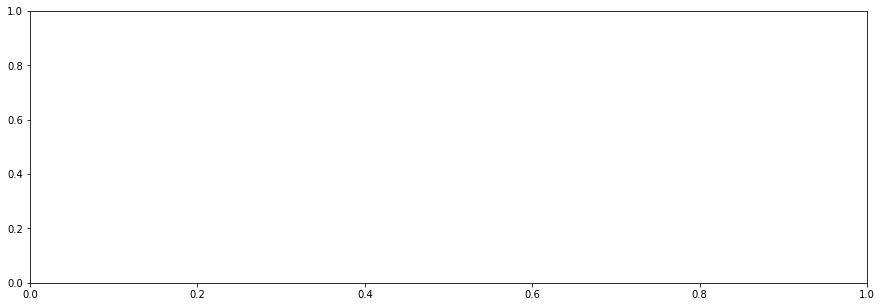

In [135]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.lineplot(data = chain1_df, x = 'iteration', y = 'theta1', ax = ax)
sns.lineplot(data = chain2_df, x = 'iteration', y = 'theta1', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.lineplot(data = chain1_df, x = 'iteration', y = 'theta15', ax = ax)
sns.lineplot(data = chain2_df, x = 'iteration', y = 'theta15', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.histplot(data = chain1_df, x = 'theta1', ax = ax)
sns.histplot(data = chain2_df, x = 'theta1', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.histplot(data = chain1_df, x = 'theta15', ax = ax)
sns.histplot(data = chain2_df, x = 'theta15', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

## Lucia's Implementation

In [152]:
import torch
import matplotlib.pyplot as plt
#from tqdm import trange

torch.manual_seed(0)

In [153]:
def loga_conditional(a, b, theta, y, sigmasq):
    """Function to compute the (log) full conditional probability of an observed value of 
    variable a at a given index i. To get the actual conditional probability, raise
    Euler's constant to the power of the returned value.
    
    Parameters
    ----------
    a : torch.tensor
        The observed value of a at index i
    b : torch.tensor
        The observed value of b at index i
    theta : torch.tensor
        A vector of observed theta values
    y : torch.tensor
        The ith column vector of the data Y
    sigmasq : float
        The variance of variable a
        
    Returns
    -------
    prob : torch.tensor
        The (log) conditional probability
    """
    
    assert theta.shape[0] == y.shape[0]
    
    logsum = 0
    for p in range(y.shape[0]):
        logsum += (a * y[p] * theta[p]) - torch.log(1 + torch.exp(a*theta[p]-b))
    
    prob = logsum - (torch.pow(a, 2)/(2*sigmasq))
    return prob

def logb_conditional(b, a, theta, y, sigmasq):
    """Function to compute the (log) full conditional probability of an observed value of 
    variable b at a given index i. To get the actual conditional probability, raise
    Euler's constant to the power of the returned value.
    
    Parameters
    ----------
    a : torch.tensor
        The observed value of a at index i
    b : torch.tensor
        The observed value of b at index i
    theta : torch.tensor
        A vector of observed theta values
    y : torch.tensor
        The ith column vector of the data Y
    sigmasq : float
        The variance of variable a
        
    Returns
    -------
    prob : torch.tensor
        The (log) conditional probability
    """
    
    assert theta.shape[0] == y.shape[0]
    
    logsum = 0
    for p in range(y.shape[0]):
        logsum += ((-1.0*b) * y[p]) - torch.log(1 + torch.exp(a*theta[p]-b))  # trying -1.0x to see if samples better
    
    prob = logsum - (torch.pow(b, 2)/(2*sigmasq))
    return prob

def logtheta_conditional(theta, a, b, y, sigmasq):
    """Function to compute the (log) full conditional probability of an observed value of 
    variable theta at a given index p. To get the actual conditional probability, raise
    Euler's constant to the power of the returned value.
    
    Parameters
    ----------
    a : torch.tensor
        A vector of observed a values
    b : torch.tensor
        A vector of observed b values
    theta : torch.tensor
        The observed value of theta at index p
    y : torch.tensor
        The pth row vector of the data Y
    sigmasq : float
        The variance of variable theta
        
    Returns
    -------
    prob : torch.tensor
        The (log) conditional probability
    """

    assert a.shape == b.shape
    
    logsum = 0
    for i in range(a.shape[0]):
        logsum += (a[i] * y[i] * theta) - torch.log(1 + torch.exp(a[i]*theta - b[i]))
    
    prob = logsum - (torch.pow(theta, 2)/2*sigmasq)
    return prob

In [154]:
def metropolis(prev_sample, sigmasq, avg_acc, full_cond, *full_cond_args):
    """Function to perform random-walk metropolis sampling of a full conditional distribution. 

    Parameters
    ----------
    prev_sample : torch.Tensor
        Previous sampled state, to update or not
    sigmasq : float
        The variance of the random walk
    avg_acc : torch.Tensor
        The running average acceptance rate for the samples
    full_cond : function
        The full conditional distribution from which to sample
    *full_cond_args : tuple
        Additional arguments needed for the full conditional distribution, if any

    Returns
    -------
    update : torch.Tensor
        The next state of the random walk
    """
    
    prop = prev_sample + (torch.distributions.Normal(torch.tensor([0.0]), sigmasq)).sample()
    
    # Ensure that values are within range [0,1]
    if (prop > 1) or (prop < 0):
        A = 0
    else:
        logr = full_cond(prop, *full_cond_args) - full_cond(prev_sample, *full_cond_args)    
        A = torch.min(torch.tensor([1.0]), torch.exp(logr)) 
    #logr = full_cond(prop, *full_cond_args) - full_cond(prev_sample, *full_cond_args)    
    #A = torch.min(torch.tensor([1.0]), torch.exp(logr)) 
        
    U = (torch.distributions.Uniform(torch.tensor([0.0]), torch.tensor([1.0]))).sample()

    update = None
    
    if U <= A:
        update = prop
    else:
        update = prev_sample

    acc_diff = A - avg_acc
    return update, acc_diff


def ada_metropolis(prev_sample, sigmasq, scale, s, avg_acc, full_cond, *full_cond_args, rho=0.6, tau=0.3):
    """Function to perform adaptive random-walk metropolis sampling of a full conditional distribution. 

    Parameters
    ----------
    prev_sample : torch.Tensor
        Previous sampled state, to update or not
    sigmasq : float
        The variance of the random walk
    scale : torch.Tensor
        The scale value for adaptation
    s : int
        Current iteration
    avg_acc : torch.Tensor
        The running average acceptance rate for the samples
    full_cond : function
        The full conditional distribution from which to sample
    *full_cond_args : tuple
        Additional arguments needed for the full conditional distribution, if any

    Returns
    -------
    update : torch.Tensor
        The next state of the random walk
    scale : torch.Tensor
        The updated scale value for adaptation
    acc_diff : torch.Tensor
        A sample-specific value to calculate overall average acceptance rates
    """

    #print(scale.shape)
    prop = prev_sample + (torch.exp(scale)*torch.distributions.Normal(torch.tensor([0.0]), sigmasq).sample())

    # Ensure that sampled values are within [0,1]
    if (prop > 1) or (prop < 0):
        A = 0
    else:
        logr = full_cond(prop, *full_cond_args) - full_cond(prev_sample, *full_cond_args)    
        A = torch.min(torch.tensor([1.0]), torch.exp(logr)) 
    
    #logr = full_cond(prop, *full_cond_args) - full_cond(prev_sample, *full_cond_args)    
    #A = torch.min(torch.tensor([1.0]), torch.exp(logr)) 
    U = (torch.distributions.Uniform(torch.tensor([0.0]), torch.tensor([1.0]))).sample()

    update = None
    
    if U <= A:
        update = prop
    else:
        update = prev_sample

    scale = scale + (1/s**rho)*(A-tau)
    acc_diff = A - avg_acc
    return update, scale, acc_diff

In [155]:
def gibbs(init_a, init_b, init_theta, y, sigmasq_a, sigmasq_b, sigmasq_t, niter=10000, adapt=False):
    """Function to perform Gibbs sampling, using Metropolis-within-Gibbs for the intractable full conditional distributions.

    Parameters
    ----------
    init_a : torch.Tensor
        The initial state of variable a
    init_b : torch.Tensor
        The initial state of variable b
    init_theta : torch.Tensor
        The initial state of variable theta
    y : torch.Tensor
        The data
    sigmasq_a : torch.Tensor
        The prior for the variance of variable a
    sigmasq_b : torch.Tensor
        The prior for the variance of variable b
    sigmasq_t : torch.Tensor
        The prior for the variance of variable theta
    niter : int
        The number of samples to collect

    Returns
    -------
    A : torch.Tensor
        The samples for each element of variable a
    B : torch.Tensor
        The samples for each element of variable b
    THETA : torch.Tensor
        The samples for each element of variable theta
    """
    
    assert init_a.shape == init_b.shape
    assert init_theta.shape[0] == y.shape[0]
    
    I = len(init_a)
    P = len(init_theta)
    
    # samples
    A = torch.empty(size=(niter, I))
    B = torch.empty(size=(niter, I))
    THETA = torch.empty(size=(niter, P))

    # Average acceptance probabilities
    avg_acc_a, avg_acc_b, avg_acc_t = torch.zeros((I,)), torch.zeros((I,)), torch.zeros((P,))
    
    A[0] = init_a
    B[0] = init_b
    THETA[0] = init_theta
    
    if adapt:
        scale_a, scale_b, scale_t = torch.full((I,), -0.2), torch.full((I,), -0.2), torch.full((P,), -0.2)
        print(f"Starting Gibbs sampler with adaptation... \n--------------------------------------------\n")
    else:
        print(f"Starting Gibbs sampler... \n--------------------------------------------\n")
        
    for s in range(1, niter):

        for i in range(I):
            if not adapt:
                A[s][i], ad = metropolis(A[s-1][i], sigmasq_a, avg_acc_a[i], loga_conditional, B[s-1][i], THETA[s-1], y[:,i], sigmasq_a)
                avg_acc_a[i] = avg_acc_a[i] + (1/s)*ad
            else:
                A[s][i], sc, ad = ada_metropolis(A[s-1][i], sigmasq_a, scale_a[i], s, avg_acc_a[i], 
                                                 loga_conditional, B[s-1][i], THETA[s-1], y[:,i], sigmasq_a)
                avg_acc_a[i] = avg_acc_a[i] + (1/s)*ad
                scale_a[i] = sc
                
        for i in range(I):
            if not adapt:
                B[s][i], ad = metropolis(B[s-1][i], sigmasq_b, avg_acc_b[i], logb_conditional, A[s][i], THETA[s-1], y[:,i], sigmasq_b)
                avg_acc_b[i] = avg_acc_b[i] + (1/s)*ad
            else:
                B[s][i], scale_b[i], ad = ada_metropolis(B[s-1][i], sigmasq_b, scale_b[i], s, avg_acc_b[i], 
                                                         logb_conditional, A[s][i], THETA[s-1], y[:,i], sigmasq_b)
                avg_acc_b[i] = avg_acc_b[i] + (1/s)*ad
                
        for p in range(P):
            if not adapt:
                THETA[s][p], ad = metropolis(THETA[s-1][p], sigmasq_t, avg_acc_t[p], logtheta_conditional, A[s], B[s], y[p,:], sigmasq_t)
                #print(ad)
                avg_acc_t[p] = avg_acc_t[p] + (1/s)*ad  # FIXME: calculation error here? why all 0s?
                #print(avg_acc_t[i])
            else:
                THETA[s][p], scale_t[p], ad = ada_metropolis(THETA[s-1][p], sigmasq_t, scale_t[p], s, avg_acc_t[p], 
                                                             logtheta_conditional, A[s], B[s], y[p,:], sigmasq_t)
                avg_acc_t[p] = avg_acc_t[p] + (1/s)*ad  # FIXME: calculation error here? why all 0s?
                
    print("Done sampling.")
    print("Average acceptance rates:\n", avg_acc_a, "\n", avg_acc_b, "\n", avg_acc_t) 
    return A, B, THETA

In [156]:
# TEST
N = 50000  # iterations
I = 10     # exam items
P = 50    # pupils

init_a = torch.zeros(I)  
init_b = torch.zeros(I)  
init_t = torch.zeros(P)  

true_a = torch.empty(size=(I,)) #torch.tensor([1, 0.9, 0.01, 0.5, 0.7, 0.4, 0.03, 0.9, 0.8, 1])  # items' discriminatory power
true_b = torch.empty(size=(I,)) #torch.tensor([0.01, 0.9, 1, 0.8, 0.2, 0.3, 0.88, 1, 0.3, 0.5])  # items' difficulty
true_theta = torch.empty(size=(P,)) #torch.tensor([1, 1, 0, 0.5, 0.7, 0.1, 0.3, 0.9, 0.6, 0.7])  # students' skills

# populate a, b:
for i in range(I):
    U = torch.distributions.Uniform(torch.tensor([0.0]), torch.tensor([1.0]))
    true_a[i] = U.sample()
    true_b[i] = U.sample()
    
# populate theta:
for p in range(P):
    U = torch.distributions.Uniform(torch.tensor([0.0]), torch.tensor([1.0]))
    true_theta[p] = U.sample()

# generate exam data:
Y = torch.empty(size=(P, I))

for i in range(I):
    #print(i)
    for p in range(P):
        #print(p)
        prob = torch.exp(true_a[i]*true_theta[p] - true_b[i]) / (1 + torch.exp(true_a[i]*true_theta[p] - true_b[i]))
        B = torch.distributions.Bernoulli(prob)
        Y[p][i] = B.sample()

print(Y)

tensor([[1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
        [0., 1., 1., 1., 1., 0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 1., 0., 1., 1., 1., 1.],
        [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
        [1., 1., 1., 0., 1., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
        [1., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
        [0., 0., 1., 0., 1., 1., 1., 0., 1., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 1., 1., 0., 1., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],


In [157]:
sigmasq_a, sigmasq_b, sigmasq_t = torch.tensor([1.0]), torch.tensor([1.0]), torch.tensor([1.0])  # priors
samples = gibbs(init_a, init_b, init_t, Y, sigmasq_a, sigmasq_b, sigmasq_t, niter=N)

Starting Gibbs sampler... 
--------------------------------------------

Done sampling.
Average acceptance rates:
 tensor([0.2810, 0.2721, 0.2912, 0.2538, 0.2891, 0.2869, 0.2950, 0.2984, 0.2793,
        0.3044]) 
 tensor([0.2789, 0.1308, 0.2752, 0.2008, 0.2728, 0.2684, 0.2736, 0.2300, 0.2597,
        0.1743]) 
 tensor([0.2994, 0.3420, 0.3296, 0.3053, 0.3466, 0.3417, 0.3266, 0.3412, 0.3120,
        0.3473, 0.3438, 0.3391, 0.3346, 0.2830, 0.3113, 0.3077, 0.2868, 0.3466,
        0.3406, 0.3032, 0.3427, 0.3023, 0.3468, 0.3330, 0.3454, 0.3434, 0.3294,
        0.3181, 0.3428, 0.3320, 0.3445, 0.2914, 0.3439, 0.3067, 0.3180, 0.3333,
        0.3395, 0.3148, 0.3469, 0.3076, 0.2891, 0.3479, 0.3369, 0.3426, 0.3174,
        0.2954, 0.3452, 0.3395, 0.3126, 0.3424])


In [158]:
print("A:")
print(torch.mean(samples[0], 0))  # mean over the columns
print(true_a)

print("B:")
print(torch.mean(samples[1], 0))  # mean over the columns
print(true_b)

print("THETA:")
print(torch.mean(samples[2], 0))  # mean over the columns
print(true_theta)

A:
tensor([0.4095, 0.6258, 0.4330, 0.3364, 0.4302, 0.4166, 0.4500, 0.4825, 0.3898,
        0.5430])
tensor([0.4963, 0.0885, 0.3074, 0.4901, 0.4556, 0.3489, 0.0223, 0.2939, 0.6977,
        0.1610])
B:
tensor([0.5330, 0.1747, 0.5401, 0.7375, 0.5438, 0.5871, 0.4472, 0.3178, 0.6306,
        0.2276])
tensor([0.7682, 0.1320, 0.6341, 0.8964, 0.6323, 0.4017, 0.1689, 0.5185, 0.8000,
        0.2823])
THETA:
tensor([0.3993, 0.4763, 0.4570, 0.4062, 0.5198, 0.5261, 0.4453, 0.5229, 0.4170,
        0.4855, 0.4828, 0.4659, 0.4506, 0.3733, 0.4143, 0.4140, 0.3805, 0.5183,
        0.4686, 0.4070, 0.4791, 0.4042, 0.4723, 0.4575, 0.5163, 0.4802, 0.4430,
        0.4274, 0.5243, 0.4492, 0.5151, 0.3891, 0.5124, 0.4060, 0.4327, 0.4447,
        0.4635, 0.4185, 0.4760, 0.4142, 0.6073, 0.5022, 0.4577, 0.4840, 0.4258,
        0.4005, 0.5232, 0.4823, 0.4157, 0.4900])
tensor([0.6816, 0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362, 0.1852,
        0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507, 0.0317, 0.2081

# Gibbs

In [288]:
data = [Y]

a_1 = np.zeros(PROBLEM_COUNT)
b_1 = np.zeros(PROBLEM_COUNT)
theta_1 = np.zeros(STUDENT_COUNT)
w_1 = np.zeros((STUDENT_COUNT, PROBLEM_COUNT))
for p in range(len(w_1)):
    for i in range(len(w_1[p])):
        w_1[p][i] = random_polyagamma(z = np.abs(a_1[i] * theta_1[p] + b_1[i]))

a_2 = np.ones(PROBLEM_COUNT) * 100
b_2 = np.ones(PROBLEM_COUNT) * 100
theta_2 = np.ones(STUDENT_COUNT) * 40
w_2 = np.zeros((STUDENT_COUNT, PROBLEM_COUNT))
for p in range(len(w_2)):
    for i in range(len(w_2[p])):
        w_2[p][i] = random_polyagamma(z = np.abs(a_2[i] * theta_2[p] + b_2[i]))


x_init = np.array([w_1, a_1, b_1, theta_1], dtype = 'object')
y_init = np.array([w_2, a_2, b_2, theta_2], dtype = 'object')

params_x, params_y = irt_gibbs_wrapper1(data, x_init, y_init, max_iteration = 10000)


In [289]:
chain1_df = pd.DataFrame([np.hstack(x[1:]) for x in params_x], columns = [str(i) for i in range(PROBLEM_COUNT * 2 + STUDENT_COUNT)])
chain2_df = pd.DataFrame([np.hstack(y[1:]) for y in params_y], columns = [str(i) for i in range(PROBLEM_COUNT * 2 + STUDENT_COUNT)])
chain1_df = chain1_df.reset_index().rename(columns = {'index': 'iteration'})
chain2_df = chain2_df.reset_index().rename(columns = {'index': 'iteration'})

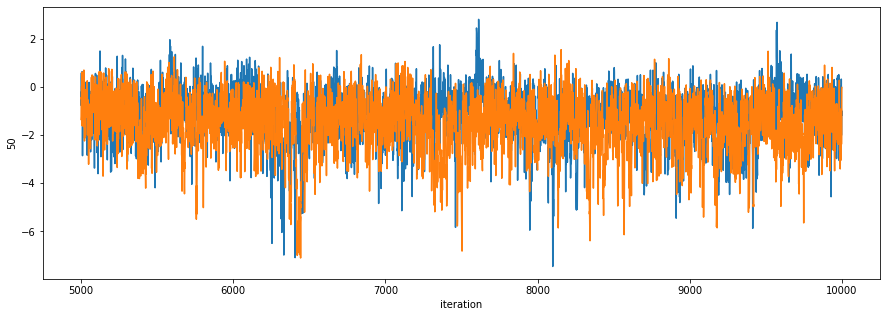

In [290]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.lineplot(data = chain1_df[5000:], x = 'iteration', y = '50', ax = ax)
sns.lineplot(data = chain2_df[5000:], x = 'iteration', y = '50', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

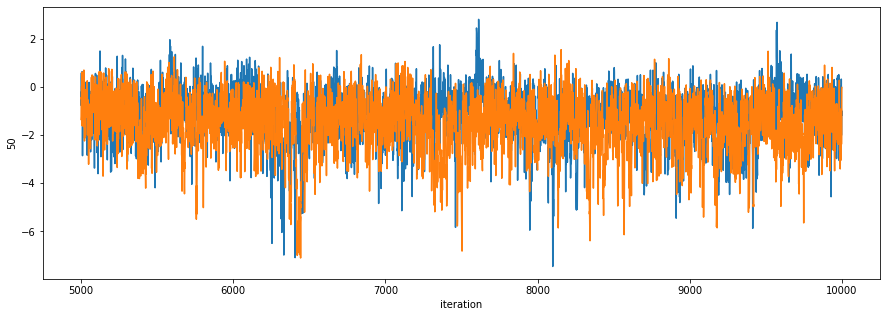

In [293]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.lineplot(data = chain1_df[5000:], x = 'iteration', y = '50', ax = ax)
sns.lineplot(data = chain2_df[5000:], x = 'iteration', y = '50', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

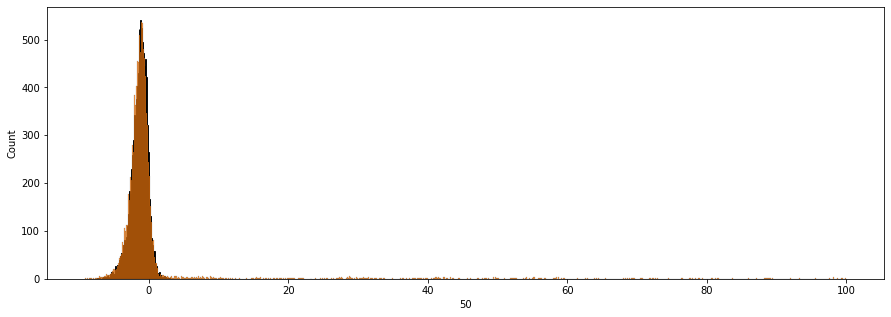

In [292]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.histplot(data = chain1_df, x = '50', ax = ax)
sns.histplot(data = chain2_df, x = '50', ax = ax)

#ax.set_xlim(0, 1000000)
plt.show()

### Idea: Maximal coupling for polyagamma and reflective coupling for a, b, theta

In [ ]:
# sample alpha and beta separately
def irt_gibbs_wrapper1(data, x_init, y_init, max_iteration = 10000):
    params_x = [x_init]
    params_y = [y_init]

    for i in range(max_iteration):
        temp_x = params_x[-1].copy()
        temp_x[1] = alpha(data[0], temp_x)
        temp_x[2] = beta(data[0], temp_x)
        temp_x[3] = theta(data[0], temp_x)
        temp_x[0] = polyagamma(data[0], temp_x)
        params_x.append(temp_x)

        temp_y = params_y[-1].copy()
        temp_y[1] = alpha(data[0], temp_y)
        temp_y[2] = beta(data[0], temp_y)
        temp_y[3] = theta(data[0], temp_y)
        temp_y[0] = polyagamma(data[0], temp_y)
        params_y.append(temp_y)

    return params_x, params_y
        

In [ ]:
def coupled_gibbs_irt(data, x_init, y_init, converge_fun, coupling_fun, logpdf_fun, tuning, k = 100, lag = 1, maximum_iteration = 10000, verbose = True):

    params_x = [x_init]
    params_y = [y_init]
    
    iteration = 0

    while not converge_fun(params_x[-1][-1], params_y[-1][-1]):
        if lag <= iteration:
            temp_x = np.zeros(len(x_init), dtype = 'object')
            temp_y = np.zeros(len(x_init), dtype = 'object')

            alpha_x = np.zeros(len(params_x[-1][1]))
            alpha_y = np.zeros(len(params_y[-1][1]))

            beta_x = np.zeros(len(params_x[-1][2]))
            beta_y = np.zeros(len(params_y[-1][2]))

            theta_x = np.zeros(len(params_x[-1][3]))
            theta_y = np.zeros(len(params_y[-1][3]))

            poly_x = np.zeros(len(params_x[-1][0]))
            poly_y = np.zeros(len(params_y[-1][0]))

            for j in range(len(alpha_x)):
                prev_x = params_x[-1][1][j]
                prev_y = params_y[-1][1][j]

                calculate mu, variance

                x_rv = None
                y_rv = None
                log_x = None
                log_y = None
                
                x_prop[j], y_prop[j] = reflective_coupling(mu_x, mu_y, x_rv, y_rv, log_x, log_y, 0)
            
            temp_x[0] = x_prop
            temp_y[0] = y_prop
                
            x_prop = np.zeros(len(params_x[-1][-1]))
            y_prop = np.zeros(len(params_x[-1][-1]))
            
            for j in range(len(x_prop)):
                prev_x = params_x[-1][-1][j]
                prev_y = params_y[-1][-1][j]

                x_rv = lambda: scipy.stats.norm.rvs(prev_x, np.sqrt(tuning[j]))
                y_rv = lambda: scipy.stats.norm.rvs(prev_y, np.sqrt(tuning[j]))
                log_x = lambda z: scipy.stats.norm.logpdf(z, prev_x, np.sqrt(tuning[j]))
                log_y = lambda z: scipy.stats.norm.logpdf(z, prev_y, np.sqrt(tuning[j]))

                temp_x_prop, temp_y_prop = coupling_fun(prev_x, prev_y, x_rv, y_rv, log_x, log_y, tuning[j])
                
                log_u = np.log(random.uniform(0, 1))
                x_prop[j] = ar(prev_x, temp_x_prop, log_u, lambda z: logpdf_fun(data, np.array(list(temp_x[:-1]) + [np.hstack((x_prop[:j], z, params_x[-1][-1][j + 1:]))], dtype = 'object')))
                y_prop[j] = ar(prev_y, temp_y_prop, log_u, lambda z: logpdf_fun(data, np.array(list(temp_y[:-1]) + [np.hstack((y_prop[:j], z, params_y[-1][-1][j + 1:]))], dtype = 'object')))
            
            temp_x[-1] = x_prop
            temp_y[-1] = y_prop
            
            params_x.append(temp_x)
            params_y.append(temp_y)

        else:
            temp_x = np.zeros(len(x_init), dtype = 'object')

            x_prop = np.zeros(len(params_x[-1][0])) # 15
            
            for j in range(15):
                x_prop[j] = scipy.stats.beta.rvs(data[0][j] + params_x[-1][-1][0], data[1][j] - data[0][j] + params_x[-1][-1][1])
            
            temp_x[0] = x_prop
            
            x_prop = np.zeros(len(params_x[-1][-1]))

            for j in range(len(x_prop)):
                prev_x = params_x[-1][-1][j]

                temp_x_prop = scipy.stats.norm.rvs(prev_x, np.sqrt(tuning[j]))

                log_u = np.log(random.uniform(0, 1))
                x_prop[j] = ar(prev_x, temp_x_prop, log_u, lambda z: logpdf_fun(data, np.array(list(temp_x[:-1]) + [np.hstack((x_prop[:j], z, params_x[-1][-1][j + 1:]))], dtype = 'object')))
            
            temp_x[-1] = x_prop
            
            params_x.append(temp_x)            
            
        iteration += 1
        if iteration == maximum_iteration:
            break

    if verbose:
        print(iteration)

    if iteration != maximum_iteration:
        for i in range(k):
            temp_x = np.zeros(len(x_init), dtype = 'object')

            x_prop = np.zeros(len(params_x[-1][0])) # 15
            
            for j in range(15):
                x_prop[j] = scipy.stats.beta.rvs(data[0][j] + params_x[-1][-1][0], data[1][j] - data[0][j] + params_x[-1][-1][1])
            
            temp_x[0] = x_prop
            
            x_prop = np.zeros(len(params_x[-1][-1]))

            for j in range(len(x_prop)):
                prev_x = params_x[-1][-1][j]

                temp_x_prop = scipy.stats.norm.rvs(prev_x, np.sqrt(tuning[j]))

                log_u = np.log(random.uniform(0, 1))
                x_prop[j] = ar(prev_x, temp_x_prop, log_u, lambda z: logpdf_fun(data, np.array(list(temp_x[:-1]) + [np.hstack((x_prop[:j], z, params_x[-1][-1][j + 1:]))], dtype = 'object')))
            
            temp_x[-1] = x_prop
            
            params_x.append(temp_x) 
            params_y.append(temp_x) 

    return params_x, params_y, iteration
    

## Lucia's Implementation

In [ ]:
import torch
import matplotlib.pyplot as plt
#from tqdm import trange

import pymc as pm
import pytensor as pt
from pymc import PolyaGamma as PG
from pymc import Normal as N

In [ ]:
# TODO: try negating the true_b vector and use +b everywhere in calculations

def _compute_mean_a(v, b, theta, w, y):
    S = torch.sum(torch.mul(theta, y-0.5+torch.mul(b, w)))
    mean = v*S        
    return mean.item()

def _compute_var_a(sigmasq, theta, w):
    S = torch.sum(torch.mul(w, torch.pow(theta, 2))) + 1/sigmasq
    var = 1/S
    return var.item()

def _compute_mean_b(v, a, theta, w, y):
    S = torch.sum(y-0.5-a*torch.mul(theta, w))
    mean = v*S
    return mean.item()

def _compute_var_b(sigmasq, w):
    S = torch.sum(w) + 1/sigmasq
    var = 1/S
    return var.item()

def _compute_mean_t(v, a, b, w, y):
    S = torch.sum(torch.mul(a, y-0.5+torch.mul(b, w)))  
    mean = v*S
    return mean.item()    

def _compute_var_t(sigmasq, a, w):
    S = torch.sum(torch.mul(w, torch.pow(a, 2))) + 1/sigmasq
    #print("S ", S)
    #print(torch.mul(w, torch.pow(a, 2)))
    var = 1/S
    return var.item()

def polyagamma(init_a, init_b, init_t, init_w, y, sigmasq_a, sigmasq_b, sigmasq_t, niter=10000):

    assert init_a.shape == init_b.shape
    assert init_t.shape[0] == y.shape[0]
    assert y.shape == init_w.shape
    
    I = len(init_a)
    P = len(init_t)
    
    # samples
    A = torch.empty(size=(niter, I))
    B = torch.empty(size=(niter, I))
    THETA = torch.empty(size=(niter, P))
    W = torch.empty(size=(niter, P, I))
    
    A[0] = init_a
    B[0] = init_b
    THETA[0] = init_t
    W[0] = init_w

    print(f"Starting Gibbs sampler for Polya-Gamma... \n--------------------------------------------\n")
    for s in trange(niter):

        # sample Ws
        for p in range(P):
            for i in range(I):
                # TODO: vectorize? nested loop seems very slow
                W[s][p][i] = torch.from_numpy(pm.draw(PG.dist(h=1, z=(A[s-1][i]*THETA[s-1][p] + B[s-1][i]))))  # trying +b

        # sample As
        for i in range(I):
            var_a = _compute_var_a(sigmasq_a, THETA[s-1], W[s][:,i])
            mean_a = _compute_mean_a(var_a, B[s-1][i], THETA[s-1], W[s][:,i], y[:,i])
            #print(var_a)
            #print(mean_a)
            try:
                A[s][i] = torch.distributions.Normal(mean_a, var_a).sample()
            except ValueError:
                A[s][i] = torch.distributions.Normal(mean_a, var_a+0.001).sample()

        # sample Bs
        for i in range(I):
            var_b = _compute_var_b(sigmasq_b, W[s][:,i])
            mean_b = _compute_mean_b(var_b, A[s][i], THETA[s-1], W[s][:,i], y[:,i])
            try: 
                B[s][i] = torch.distributions.Normal(mean_b, var_b).sample()
            except ValueError:
                B[s][i] = torch.distributions.Normal(mean_b, var_b+0.001).sample()

        # sample THETAs
        for p in range(P):
            var_t = _compute_var_t(sigmasq_t, W[s][p], A[s])
            mean_t = _compute_mean_t(var_t, A[s], B[s], W[s][p,:], y[p,:])
            #print("mean: ", mean_t)
            #print("variance: ", var_t)
            try:
                THETA[s][p] = torch.distributions.Normal(mean_t, var_t).sample()
            except ValueError:
                var_t = torch.abs(torch.tensor([var_t + 0.001]))
                THETA[s][p] = torch.distributions.Normal(mean_t, var_t).sample()

    return A, B, THETA, W

In [ ]:
# TEST

N = 1000  # iterations
I = 10     # exam items
P = 100    # pupils
sigmasq_a, sigmasq_b, sigmasq_t = torch.tensor([1.0]), torch.tensor([1.0]), torch.tensor([1.0])  # priors

init_a = torch.zeros(I)  
init_b = torch.zeros(I)  
init_t = torch.zeros(P)
init_W = torch.zeros(P, I)

true_a = torch.tensor([1, 0.9, 0.01, 0.5, 0.7, 0.4, 0.03, 0.9, 0.8, 1])  # items' discriminatory power
true_b = -1.0*torch.tensor([0.01, 0.9, 1, 0.8, 0.2, 0.3, 0.88, 1, 0.3, 0.5])  # items' difficulty
true_theta = torch.empty(size=(P,)) #torch.tensor([1, 1, 0, 0.5, 0.7, 0.1, 0.3, 0.9, 0.6, 0.7])  # students' skills
true_W = torch.empty(size=(P,I))

# populate theta:
for p in range(P):
    U = torch.distributions.Uniform(torch.tensor([0.0]), torch.tensor([1.0]))
    true_theta[p] = U.sample()

# populate W:
for p in range(P):
    for i in range(I): 
        scale = true_a[i]*true_theta[p] + true_b[i]   # trying +b
        true_W[p][i] = torch.from_numpy(pm.draw(PG.dist(h=1, z=scale)))
        
# exam data:
Y = torch.empty(size=(P, I))

for i in range(I):
    #print(i)
    for p in range(P):
        #print(p)
        prob = torch.exp(true_a[i]*true_theta[p] + true_b[i]) / (1 + torch.exp(true_a[i]*true_theta[p] + true_b[i])) # trying +b
        B = torch.distributions.Bernoulli(prob)
        Y[p][i] = B.sample()

print(Y)

In [ ]:
# test with abs() wrapping var terms...not sure how it'll look
samples = polyagamma(init_a, init_b, init_t, init_W, Y, sigmasq_a, sigmasq_b, sigmasq_t, niter=N)

In [ ]:
print("A:")
print(torch.mean(samples[0], 0))  # mean over the columns
print(true_a)

print("B:")
print(torch.mean(samples[1], 0))  # mean over the columns
print(true_b)

print("THETA:")
print(torch.mean(samples[2], 0))  # mean over the columns
print(true_theta)

print("W:")
print(torch.mean(samples[3], 0))  # mean over the columns
print(true_W)